### MA4402 Simulación Estocástica: Teoría y Laboratorio
# Laboratorio 1: Monte Carlo y eficiencia de simulación
### Grupo: 12<br>Integrantes: Mariano Vazquez, Mario Vicuña, Miguel Videla, Pablo Zúñiga e Iván Zúñiga

In [1]:
import time
import math
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from tqdm.notebook import tqdm

## Problema 1

La función $\texttt{random()}$ del modulo random de Python es la principal función para generar números pseudo-aleatorios, esta mediante el algoritmo "*Mersenne Twister*" entrega números con una precisión de 53 bits en el intervalo semiabierto $[0,1)$.

Este algoritmo fue creado en 1997 y es por lejos el más usado a nivel mundial para generar números pseudo aleatorios, el periodo de este algoritmo es de $P = 2^{19937} -1$ (de donde proviene el nombre) y pasa muchos de los tests de aleatoriedad estadística (no todos). La sucesiones de números que genera son k-distribuidas a la precisión de 32-bits con $1\leq k < 623$, es decir, al tomar subconjuntos de tamaño $k$ consecutivos en la sucesión, los truncamos a los primeros 32-bit y vemos la secuencia resultante como un solo número de 32k-bit, cada una de estas secuencias se repite la misma cantidad de veces. 

Es importante notar que tiene fallas, como por ejemplo que las secuencias de números generadas desde condiciones iniciales muy parecidas pueden ser idénticas en un principio y demorarse bastante en divergir. Otro punto importante para este curso es que secuencias en las que solo varía la semilla no son muy apropiadas para simulaciones de Monte-Carlo que requieran generadores de números aleatorios independientes.

El algoritmo genera números a partir de una semilla, la cual se puede entregar a través de la función $\texttt{random.seed()}$, esta puede ser un entero, string o una serie de bits y si no se le entrega ninguna utiliza la hora del sistema. Para guardar la 'hora' que será usada en una realización se puede ejecutar $\texttt{state = random.getstate()}$, y luego para replicar la realización se utiliza $\texttt{random.setstate(state)}$.

## Problema 2

### P2.1)

* Cálculo de varianzas:

\begin{equation}
\begin{split}
    \text{Var}(X)&=\mathbb{E}(X^2)-\mathbb{E}(X)^2=\int_{0}^{1}(1-x^2)dx-\left(\int_{0}^{1}\sqrt{1-x^2}dx\right)^2=1-\frac{1}{3}-I^2=1-\frac{1}{3}-\left(\frac{\pi}{4}\right)^2\approx 0.04981639159\\
    \text{Var}(Z)&=\mathbb{E}(Z^2)-\mathbb{E}(Z)^2=\int_{0}^{1}\int_{0}^{1}\mathbb{1}_{\{x^2+y^2\leq 1\}}dxdy - \left(\int_{0}^{1}\int_{0}^{1}\mathbb{1}_{\{x^2+y^2\leq 1\}}dxdy\right)^2=I-I^2=\frac{\pi}{4}-\left(\frac{\pi}{4}\right)^2\approx 0.16854788832 
\end{split}
\end{equation}

/home/miguel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:59: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/home/miguel/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


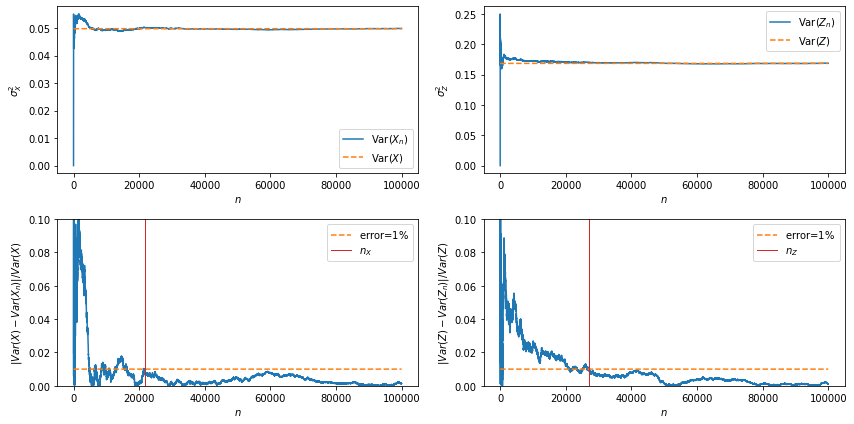

The number of samples n_x of X that achieves a variance error lower than 1% is: 21637
The number of samples n_z of Z that achieves a variance error lower than 1% is: 26979


In [2]:
np.random.seed(0)
n = 100000

# X Variable Sampling
U = np.random.uniform(size=n)
X = np.sqrt(1 - U ** 2)
E_X = np.pi/4
var_X = 1 - 1/3 - (np.pi/4) ** 2

# Z Variable Sampling
U_1 = np.random.uniform(size=n)
U_2 = np.random.uniform(size=n)
Z = U_1 ** 2 + U_2 ** 2 <= 1
E_Z = np.pi/4
var_Z = np.pi/4 - (np.pi/4) ** 2

# Empirical Variance
var_Xn = []
var_Zn = []
for i in range(1, n+1):
    var_Xn.append(X[:i].var())
    var_Zn.append(Z[:i].var())
var_Xn = np.array(var_Xn)
var_Zn = np.array(var_Zn)

# Estimation of n that error of variance lower than 1%
nx = np.argwhere(((np.abs(var_Xn - var_X) / var_X) >= 0.01))[-1][0] + 1
nz = np.argwhere(((np.abs(var_Zn - var_Z) / var_Z) >= 0.01))[-1][0] + 1

# Plots
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
plt.plot(range(1, n+1), var_Xn, label=r'Var($X_n$)')
plt.plot(range(1, n+1), np.ones(n) * var_X, '--', label=r'Var($X$)')
plt.xlabel(r'$n$')
plt.ylabel(r'$\sigma_X^2$')
plt.legend()
plt.subplot(2,2,2)
plt.plot(range(1, n+1), var_Zn, label=r'Var($Z_n$)')
plt.plot(range(1, n+1), np.ones(n) * var_Z, '--', label=r'Var($Z$)')
plt.xlabel(r'$n$')
plt.ylabel(r'$\sigma_Z^2$')
plt.legend()
plt.subplot(2,2,3)
plt.plot(range(1, n+1), np.abs(var_Xn - var_X) / var_X)
plt.plot(range(1, n+1), np.ones(n) * 0.01, '--', label=r'error=$1\%$')
plt.axvline(x=nx, linewidth=1, color='tab:red', label=r'$n_X$')
plt.xlabel(r'$n$')
plt.ylabel(r'$|Var(X)-Var(X_n)|/Var(X)$')
plt.legend()
plt.ylim([0,0.1])
plt.subplot(2,2,4)
plt.plot(range(1, n+1), np.abs(var_Zn - var_Z) / var_Z)
plt.plot(range(1, n+1), np.ones(n) * 0.01, '--', label=r'error=$1\%$')
plt.axvline(x=nz, linewidth=1, color='tab:red', label=r'$n_Z$')
plt.xlabel(r'$n$')
plt.ylabel(r'$|Var(Z)-Var(Z_n)|/Var(Z)$')
plt.legend()
plt.ylim([0,0.1])
plt.tight_layout()
plt.show()

print('The number of samples n_x of X that achieves a variance error lower than 1% is: {}'.format(nx))
print('The number of samples n_z of Z that achieves a variance error lower than 1% is: {}'.format(nz))

Se observa que la estimación de $\text{var}(X)$ y $\text{var}(Z)$ es lo suficientemente certera para un determinado número de muestras. Además, se aprecia que la cantidad de muestras $n$ para alcanzar un error de la estimación de la varianza menor al $1\%$ (y no superarlo a mayores valores de $n$) satisface $n_X<n_Z$, lo cual es esperable ya que $\text{var}(X)<\text{var}(Z)$.

### P2.2)

In [3]:
errors = np.array([0.1, 0.01, 0.001])
probs = np.array([0.9, 0.95, 0.99])
Z_scores = st.norm.ppf(1 - (1-probs)/2)
n_min_X = np.ceil(var_X * Z_scores ** 2 / errors ** 2).astype(int)
n_min_Z = np.ceil(var_Z * Z_scores ** 2 / errors ** 2).astype(int)
df_n_min = pd.DataFrame(np.array([errors, probs, n_min_X, n_min_Z]).T, columns=[r'$Err$', r'$Pr$', r'$n_x$', r'$n_z$'])
df_n_min

,$Err$,$Pr$,$n_x$,$n_z$
0,0.100,0.90,14.0,46.0
1,0.010,0.95,1914.0,6475.0
2,0.001,0.99,330527.0,1118298.0


Se observa que la cantidad de muestras $n_x$, $n_z$ requeridas para la estimación de las esperanzas de las variables aleatorias $X$ y $Z$ aumenta en función de criterios más restrictivos de error máximo $Err$ y probabilidad $Pr$ (mayores valores de estas variables), es decir, una estimación más certera requiere de una mayor cantidad de muestras. Además, se aprecia que $n_Z>n_X$ en cada uno de los regímenes de $Err,Pr$ explorados, lo cual es esperable de acuerdo a lo observado en la pregunta anterior.

### P2.3)

/home/miguel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/home/miguel/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


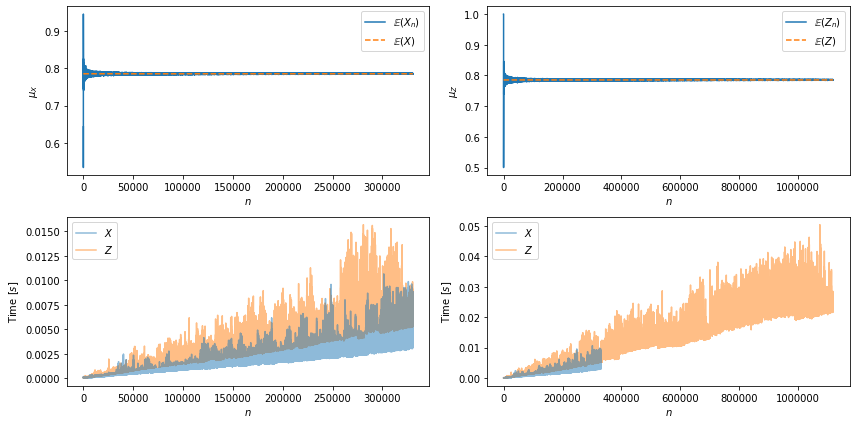

In [4]:
# Empirical expected value from X
E_Xn = []
E_Xn_times = []
for i in tqdm(range(1, n_min_X[2]+1)):
    start_time = time.time()
    U = np.random.uniform(size=i)
    X = np.sqrt(1 - U ** 2)
    X_mean = X.mean()
    end_time = time.time()
    E_Xn.append(X_mean)
    E_Xn_times.append((end_time - start_time))
E_Xn = np.array(E_Xn)
E_Xn_times = np.array(E_Xn_times)

# Empirical expected value from Z
E_Zn = []
E_Zn_times = []
for i in tqdm(range(1, n_min_Z[2]+1)):
    start_time = time.time()
    U_1 = np.random.uniform(size=i)
    U_2 = np.random.uniform(size=i)
    Z = U_1 ** 2 + U_2 ** 2 <= 1
    Z_mean = Z.mean()
    end_time = time.time()
    E_Zn.append(Z_mean)
    E_Zn_times.append((end_time - start_time))
E_Zn = np.array(E_Zn)
E_Zn_times = np.array(E_Zn_times)

# Plots
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
plt.plot(range(1, n_min_X[2]+1), E_Xn, label=r'$\mathbb{E}(X_n)$')
plt.plot(range(1, n_min_X[2]+1), np.ones(n_min_X[2]) * E_X, '--', label=r'$\mathbb{E}(X)$')
plt.xlabel(r'$n$')
plt.ylabel(r'$\mu_X$')
plt.legend()
plt.subplot(2,2,2)
plt.plot(range(1, n_min_Z[2]+1), E_Zn, label=r'$\mathbb{E}(Z_n)$')
plt.plot(range(1, n_min_Z[2]+1), np.ones(n_min_Z[2]) * E_Z, '--', label=r'$\mathbb{E}(Z)$')
plt.xlabel(r'$n$')
plt.ylabel(r'$\mu_Z$')
plt.legend()
plt.subplot(2,2,3)
plt.plot(range(1, n_min_X[2]+1), E_Xn_times, label=r'$X$', alpha=0.5, zorder=2)
plt.plot(range(1, n_min_X[2]+1), E_Zn_times[0:n_min_X[2]], label=r'$Z$', alpha=0.5, zorder=1)
plt.xlabel(r'$n$')
plt.ylabel(r'Time [$s$]')
plt.legend()
plt.subplot(2,2,4)
plt.plot(range(1, n_min_X[2]+1), E_Xn_times, label=r'$X$', alpha=0.5, zorder=2)
plt.plot(range(1, n_min_Z[2]+1), E_Zn_times, label=r'$Z$', alpha=0.5, zorder=1)
plt.xlabel(r'$n$')
plt.ylabel(r'Time [$s$]')
plt.legend()
plt.tight_layout()
plt.show()

In [5]:
# Estimation of sampling cost from X
n = 1000000
sample_cost_X = 0
for i in range(n):
    start_time = time.time()
    U = np.random.uniform(size=1)
    X = np.sqrt(1 - U ** 2)
    end_time = time.time()
    sample_cost_X += end_time - start_time
    
# Estimation of sampling cost from Z
sample_cost_Z = 0
for i in range(n):
    start_time = time.time()
    U_1 = np.random.uniform(size=1)
    U_2 = np.random.uniform(size=1)
    Z = U_1 ** 2 + U_2 ** 2 <= 1import matplotlib.pyplot as plt
    end_time = time.time()
    sample_cost_Z += end_time - start_time
    
print('Cost of sampling from X: {} [s]'.format(sample_cost_X / n))
print('Cost of sampling from Z: {} [s]'.format(sample_cost_Z / n))

Cost of sampling from X: 5.105778455734253e-06 [s]
Cost of sampling from Z: 8.617295980453492e-06 [s]


Se observa que la estimación de $\mathbb{E}(X)$ y $\mathbb{E}(Z)$ es lo suficientemente cercana al valor real $I$ dado un determinado número de muestras $n$. El tiempo de simulación involcucrado crece cuasi-linealmente en función de la cantidad de muestras en ambos casos, observándose un aumento de la dispersión de los tiempos de simulación al aumentar la cantidad de muestras, donde la varianza del tiempo de simulación de $Z$ es significativamente superior al de $X$. Los tiempos de simulación para los distintos valores de $n$ son superiores para la variable $Z$ en comparación a la variable $X$, cuya diferencia se acrecenta al aumentar el valor de $n$.

La diferencia observada entre los tiempos de simulación de ambas variables se condice con la diferencia obtenida en los tiempos estimados de simulación de una muestra para cada variable aletoria, donde el tiempo requerido para simular una muestra de $X$ es casi la mitad del tiempo requerido para simular al variable $Z$, lo cual se atribuye al hecho de que la simulación de $Z$ involucra simular $2$ variables aleatorias uniformes, mientras que la simulación de una muestra de la variable $X$ involucra simular sólo $1$ de ellas (el resto de la diferencia es atribuida a los costos relativos a cómputos aritméticos). 

### P2.4)

Se consideran dos formas de abordar el problema de estimación de los tiempos: en rigor y tal como se ha visto en clases las simulaciones de cada réplica se hacen en forma secuencial, es decir se simula una réplica **antes** de la siguiente, mientras que la librería utilizada permite generar todas las muestras de las variables uniformes en forma simultánea y se operan también paralelamente para obtener un vector completo de réplicas de la variable deseada. Ambos métodos pueden diferir en forma considerable su tiempo de ejecución por lo que se trabajará con ambos. De esta forma:
* Se puede verificar si ambos métodos son consistentes, en el sentido que no importa cual de los dos se use, las relaciones de eficiencia se mantienen (una variable será más eficiente que otra sin importar si se samplearon sus réplicas en forma secuencial o simultánea) para una misma elección de precisión y certeza.

* Se analizan los desempeños de estimar con una variable u otra desde una metodología ad-hoc a la teoría (muestreo secuencial) y desde una metodología más pragmática.

In [6]:
idx = 2
err = errors[idx]
prob = probs[idx]
nx = n_min_X[idx]
nz = n_min_Z[idx]

##### Método Secuencial

In [8]:
Tx1 = []
Tz1 = []
EX1 = []
EZ1 = []

# 500 runs to estimate total simulation time #
for i in range(0,500):
    start_time = time.time()
    xsum = 0
    for n in range(nx):
        U = np.random.uniform()
        X = np.sqrt(1 - U ** 2)
        xsum += X
    X_mean = xsum / nx
    end_time = time.time()
    Tx1.append(end_time - start_time)
    EX1.append(X_mean)
    
    start_time = time.time()
    zsum = 0
    for n in range(nz):
        U_1 = np.random.uniform()
        U_2 = np.random.uniform()
        Z = U_1 ** 2 + U_2 ** 2 <= 1
        zsum += Z
    Z_mean = zsum / nz
    end_time = time.time()
    Tz1.append(end_time - start_time)
    EZ1.append(Z_mean)

Tx1 = np.array(Tx1)
Tz1 = np.array(Tz1)
EX1 = np.array(EX1)
EZ1 = np.array(EZ1)

print('Tiempo total (promedio) de simulación con X: {} [s]'.format(Tx1.mean()))
print('Tiempo total (promedio) de simulación con Z: {} [s]'.format(Tz1.mean()))
print()
print('Error (promedio) de estimación con la variable X: {}'.format(np.abs(EX1 - E_X).mean()))
print('Error (promedio) de estimación con la variable Z: {}'.format(np.abs(EZ1 - E_Z).mean()))

Tiempo total (promedio) de simulación con X: 0.9459666337966919 [s]
Tiempo total (promedio) de simulación con Z: 4.374851414203643 [s]

Error (promedio) de estimación con la variable X: 0.0003052154252035466
Error (promedio) de estimación con la variable Z: 0.0003161034382480705


In [9]:
# Estimated Efficience Ratio from Estimated Mean Simulation Times #
effRatio = Tx1.mean()/Tz1.mean()
print('Radio de Eficiencia de X sobre Z: {}'.format(effRatio))

cx = Tx1.mean()/nx
cz = Tz1.mean()/nz

print('Costo por muestra de X: {} s'.format((cx)))
print('Costo por muestra de Z: {} s'.format((cz)))

effRatio2 = (cx * var_X) / (cz * var_Z)
print(r'$\frac{C_{X} \cdot Var(X)}{C_{Z} \cdot Var(Z)}$:', effRatio2)

Radio de Eficiencia de X sobre Z: 0.21622828851408812
Costo por muestra de X: 2.861995037611729e-06 s
Costo por muestra de Z: 3.912062271598128e-06 s
$\frac{C_{X} \cdot Var(X)}{C_{Z} \cdot Var(Z)}$: 0.21622806807725442


##### Método simultáneo

In [10]:
Tx2 = []
Tz2 = []
EX2 = []
EZ2 = []

# 500 runs to estimate total simulation time #
for i in range(0,500):
    start_time = time.time()
    U = np.random.uniform(size=nx)
    X = np.sqrt(1 - U ** 2)
    X_mean = X.mean()
    end_time = time.time()
    Tx2.append(end_time - start_time)
    EX2.append(X_mean)
    
    start_time = time.time()
    U_1 = np.random.uniform(size=nz)
    U_2 = np.random.uniform(size=nz)
    Z = U_1 ** 2 + U_2 ** 2 <= 1
    Z_mean = Z.mean()
    end_time = time.time()
    Tz2.append(end_time - start_time)
    EZ2.append(Z_mean)
    
Tx2 = np.array(Tx2)
Tz2 = np.array(Tz2)
EX2 = np.array(EX2)
EZ2 = np.array(EZ2)

print('Tiempo total (promedio) de simulación con X: {} s'.format(Tx2.mean()))
print('Tiempo total (promedio) de simulación con Z: {} s'.format(Tz2.mean()))
print()
print('Error (promedio) de estimación con la variable X: {}'.format(np.abs(EX2 - E_X).mean()))
print('Error (promedio) de estimación con la variable Z: {}'.format(np.abs(EZ2 - E_Z).mean()))

Tiempo total (promedio) de simulación con X: 0.0039190263748168945 s
Tiempo total (promedio) de simulación con Z: 0.024140136241912843 s

Error (promedio) de estimación con la variable X: 0.00032203310440479373
Error (promedio) de estimación con la variable Z: 0.0003036835333202348


Intervalo de Confianza para estimación con X (alpha = 0.01):
 [0.7853775212078766, 0.7858239126612467]
Largo del intervalo: 0.00044639145337010966

Intervalo de Confianza para estimación con Z (alpha = 0.01):
 [0.7856786719146186, 0.7864997635292433]
Largo del intervalo: 0.000821091614624736


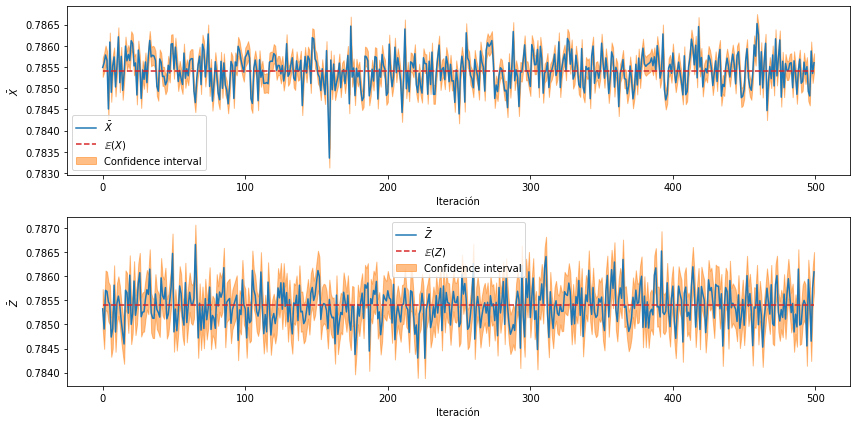

In [11]:
# By the Central Limit Theorem we define the Confidence Interval for one simulation #
z_alpha = Z_scores[idx]
sample = -1

# Lower limit #
xl = EX2[sample] - z_alpha * var_X / np.sqrt(nx)
zl = EZ2[sample] - z_alpha * var_Z / np.sqrt(nz)

# Upper limit #
xu = EX2[sample] + z_alpha * var_X / np.sqrt(nx)
zu = EZ2[sample] + z_alpha * var_Z / np.sqrt(nz)

print('Intervalo de Confianza para estimación con X (alpha = {:.2}):\n [{}, {}]'.format(1-prob, xl, xu))
print('Largo del intervalo: {}'.format(xu-xl))
print()
print('Intervalo de Confianza para estimación con Z (alpha = {:.2}):\n [{}, {}]'.format(1-prob, zl, zu))
print('Largo del intervalo: {}'.format(zu-zl))

Xl = EX2 - z_alpha * var_X / np.sqrt(nx)
Zl = EZ2 - z_alpha * var_Z / np.sqrt(nz)

Xu = EX2 + z_alpha * var_X / np.sqrt(nx)
Zu = EZ2 + z_alpha * var_Z / np.sqrt(nz)

plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
plt.plot(EX2, label = r'$\bar{X}$')
plt.fill_between(np.arange(EX2.shape[0]), Xu, Xl, alpha = 0.5, color = 'C1', label = 'Confidence interval')
plt.plot(np.arange(EX2.shape[0]), np.ones(EX2.shape[0]) * E_X, '--', label=r'$\mathbb{E}(X)$', color = 'C3')
plt.xlabel('Iteración')
plt.ylabel(r'$\bar{X}$')
plt.legend()

plt.subplot(2,1,2)
plt.plot(EZ2, label = r'$\bar{Z}$')
plt.fill_between(np.arange(EZ2.shape[0]), Zu, Zl, alpha = 0.5, color = 'C1', label = 'Confidence interval')
plt.plot(np.arange(EZ2.shape[0]), np.ones(EZ2.shape[0]) * E_Z, '--', label=r'$\mathbb{E}(Z)$', color = 'C3')
plt.xlabel('Iteración')
plt.ylabel(r'$\bar{Z}$')
plt.legend()

plt.tight_layout()
plt.show()

In [12]:
# Estimated Efficience Ratio from Estimated Mean Simulation Times #
effRatio = Tx2.mean()/Tz2.mean()
print('Radio de Eficiencia de X sobre Z: {}'.format(effRatio))

cx = Tx2.mean()/nx
cz = Tz2.mean()/nz

print('Costo por muestra de X: {} s'.format((cx)))
print('Costo por muestra de Z: {} s'.format((cz)))

effRatio2 = (cx * var_X) / (cz * var_Z)
print(r'$\frac{C_{X} \cdot Var(X)}{C_{Z} \cdot Var(Z)}$:', effRatio2)

Radio de Eficiencia de X sobre Z: 0.1623448325039923
Costo por muestra de X: 1.1856902385635347e-08 s
Costo por muestra de Z: 2.158649683886839e-08 s
$\frac{C_{X} \cdot Var(X)}{C_{Z} \cdot Var(Z)}$: 0.1623446669993717


In [13]:
effRatio = Tx1.mean()/Tx2.mean()
print('Radio de Eficiencia de X muestreado en forma secuencial sobre X muestreado en forma simultánea: {}'.format(effRatio))

effRatio = Tz1.mean()/Tz2.mean()
print('Radio de Eficiencia de Z muestreado en forma secuencial sobre Z muestreado en forma simultánea: {}'.format(effRatio))

Radio de Eficiencia de X muestreado en forma secuencial sobre X muestreado en forma simultánea: 241.37797078257466
Radio de Eficiencia de Z muestreado en forma secuencial sobre Z muestreado en forma simultánea: 181.22728763261463


En cuanto a los errores de estimación, bajo la condición de precisión y certeza dados por $Err_{3}$ y $Pr_{3}$, son prácticamente idénticos en promedio (y para ambos métodos, lo cual es consistente con el hecho de que el método solo debiera afectar el tiempo de ejecución y no la "calidad" de la estimación), no obstante los intervalos de confianza para la estimación realizada a partir de la variable $Z$ son de un largo mayor (casi el doble) lo cual está relacionado en parte a la propia varianza de las variables aleatorias consideradas (siendo $X$ la de menor varianza por un factor de aproximadamente $3$).

En cuanto a costos totales se tiene que realizar la estimación (muestrando en forma simultánea los vectores de variables uniformes) con la variable $X$ es varias veces más eficiente que con la variable $Z$, siendo el radio de eficiencia $\frac{C_{X} \cdot n_{X}}{C_{Z} \cdot n_{Z}}$ bastante menor a 1. En clases se vio que comparar el costo total (bajo un mismo régimen de precisión y certeza) empleando la razón $\frac{C_{X} \cdot Var(X)}{C_{Z} \cdot Var(Z)}$ era equivalente a comparar según el radio de eficiencia, lo cual se constata obteniéndose que $\frac{C_{X} \cdot n_{X}}{C_{Z} \cdot n_{Z}} \sim \frac{C_{X} \cdot Var(X)}{C_{Z} \cdot Var(Z)}$.

Algo similar ocurre cuando se samplean las variables aleatorias en forma secuencial, salvo que se reduce el radio de eficiencia respecto al método con muestreo simultáneo, es decir que de esta forma la estimación con una u otra variable es más similar en términos de eficiencia.

Cabe destacar que, al haber realizado las estimaciones con ambas metodologías de muestreo, es posible comparar también estas por sí mismas, en el sentido que se puede calcular el radio de eficiencia para la estimación empleando muestreos secuenciales o simultáneos de las variables aleatorias. Como cabría de esperar, al ser en el fondo una misma variable (o dos variables con una misma ley y que requieren la misma cantidad de muestras para lograr $Err_{3}$ y $Pr_{3}$), la estimación más eficiente será aquella con menor costo total o, equivalentemente, con menor costo por muestra. Se aprecia entonces que tanto para $X$ como para $Z$ es más eficiente realizar el muestreo simultáneo, obteniéndose una razón de eficiencia mucho mayor a 1, respectivamente, entre los costos requeridos con un método de muestreo u otro.

Otro punto interesante de notar es que al realizar el muestreo secuencial se aprecia que los costos por muestra estimados son más similares para ambas variables, mientras que al muestrear en simultáneo los tiempos por muestra se vuelven más disímiles en proporción. De esta forma se explica que el muestreo en simultáneo permita reducir el radio de eficiencia, ya que al requerirse la misma cantidad de muestras $n_{x}$ o $n_{z}$ para ambos métodos y como las varianzas se consideran una constante del problema, el aumento o disminución del radio de eficiencia depente netamente de la proporción $\frac{C_{X}}{C_{Z}}$, siendo esta menor en el caso de sampleo simultáneo debido a que los tiempos requeridos por muestra son más  disímiles entre sí, y luego $\frac{C_{X} \cdot n_{X}}{C_{Z} \cdot n_{Z}} \sim \frac{C_{X} \cdot Var(X)}{C_{Z} \cdot Var(Z)}$ también disminuye.

### P2.5)

In [14]:
# Efficience Ratio using the number of uniform random variables requiered per sample #
effRatio = (1 * nx) / (2 * nz)
print('Radio de Eficiencia de X sobre Z: {}'.format(effRatio))

effRatio2 = (1 * var_X) / (2 * var_Z)
print(r'$\frac{C_{X} \cdot Var(X)}{C_{Z} \cdot Var(Z)}$:', effRatio2)

Radio de Eficiencia de X sobre Z: 0.14778127118174225
$\frac{C_{X} \cdot Var(X)}{C_{Z} \cdot Var(Z)}$: 0.14778112052413994


Considerando como costo por muestra la cantidad de variables aleatorias uniformes requeridas para simular una muestra de la variable a simular se tiene que el costo de una muestra de $X$ es $C_{X} = 1$ mientras que para $Z$ es $C_{Z} = 2C_{x} = 2$. De esta forma el radio de eficiencia está dado por $\frac{n_{x}}{2 \cdot n_{z}} \sim \frac{Var(X)}{2 \cdot Var(Z)}$, obteniéndose que, relativamente a los radios estimados anteriormente, la eficiencia de $X$ por sobre $Z$ es aún mayor, pues el radio es menor a cualquiera de los anteriormente calculados . La diferencia radica principalmente en que se desprecian los costos asociados a cualquier operación ajena al propio muestreo de las variables uniformes. 

Una ventaja de considerar el costo medido en cantidad de uniformes en lugar del propio tiempo es que se puede realizar una estimación de la eficiencia sin necesidad de realizar la simulaciones, es decir que permite tener una estimación *a priori* del radio de eficiencia (sujeto a haber calculado las varianzas y/o la cantidad de muestras necesarias). Un cálculo más preciso requeriría conocer el tiempo que requiere cada operación que se realiza sobre las variables uniformes para convertirlas en la variable deseada lo cual puede ser aún más demandante que simplemente realziar una simulación y medir el tiempo total. No obstante, es precisamente en este punto donde aparece la gran desventaja de este cálculo *a priori*, puesto que se obvian en sí los costos computacionales que son los que al final del día suelen ser el factor de interés. Por ejemplo si en la práctica las operaciones realizadas sobre una variable uniforme $U$ para obtener otra $X$ requieren varias veces la cantidad de tiempo que para calcular otra variable $Z$ a partir de dos uniformes este cálculo *a priori* es de hecho un mal modelamiento del costo ("real") y por ende puede llevar a conclusiones anticipadas y erróneas. 

Sin embargo, esta aproximación *naive* resulta relativamente concluyente si se sabe que dichos recursos computacionales son relativamente despreciables. Para el caso estudiado se tiene de hecho que este cálculo se aproxima bastante bien al costo asociado al muestreo simultáneo realizado anteriormente (donde de hecho los costos por muestra se relacionan en una proporción bastante similar a $\frac{1}{2}$), precisamente porque la aritmética requerida para obtener $X$ a partir de $U$ y $Z$ a partir de $U_{1}, U_{2}$ es computacionalmente barata.

En términos generales se puede decir que el criterio basado en el costo total es más deseable ya que refleja en mejor medida las características reales de las simulaciones y se puede aplicar para prácticamente cualquier variable (cuyo costo en aritmética es alto o bajo, incluso costo aleatorio como lo son variables geométricas o de Poisson). El cómputo en base a cantidad de uniformes puede resultar útil y relevante bajo el conocimiento previo de que los costos computacionales asociados a la transformación de las propias uniformes son comparables y/o despreciables, como se evidencia en los casos estudiados en este problema.

## Problema 3

In [ ]:
from time import time

#### Comentario general

Los métodos $DiscreteQuantile$, $DiscreteQuantileF$ y $ContinuousQuantile$ son métodos de simulación de variables aleatorias todos basados en la distribución inversa generalizada de variables aleatorias. Recordemos el siguiente resultado teórico visto en clases: 

Si $X$ es v.a., $F_X^{-1}$ es su distribución inversa generalizada y $U\sim Uniforme[0,1]$, entonces $F_X^{-1}(U)=X$ $\textbf{en ley}$.

Para la parte de las simulaciones, utilizaremos sampleos de variables aleatorias uniformes para simular la v.a. $X$ que se especifica más adelante. Luego, gracias al resultado teórico, cada método nos entregará un vector cuya distribución es la de $X$, es decir, estaremos simulando $X$.

### P3.1)
Programación del método $\textit{DiscreteQuantile(f, u)}$. Notar que internamente estamos construyendo la función de distribución de la variable aleatoria asociada, donde se programa la suma iterada.

In [38]:
def DiscreteQuantile(f, u):
    r = len(u)
    n = np.ones(r, dtype=int)
    for i in range(r):
        s = f(1)
        while s < u[i]:
            n[i] += 1
            s += f(n[i])
    return n

### P3.2)
Programación del método $\textit{DiscreteQuantileF(F, u)}$. A diferencia del método anterior, este método recibe la distribución armada y realiza la misma comparación. El cálculo que realizan este método y el anterior son matemáticamente equivalentes.

In [39]:
def DiscreteQuantileF(F, u):
    r = len(u)
    n = np.ones(r, dtype=int)
    for i in range(r):
        while F(n[i]) < u[i]:
            n[i] += 1
    return n

### P3.3)
Programación del método $\textit{ContinuousQuantileF(F, f, u)}$. En este caso usamos el método de Newton-Raphson de búsqueda de ceros para encontrar el mejor real $x_i$ que aproxime $u_i$ según la tolerancia $tol$ que será inicializada como $10^{-4}$.

In [40]:
def ContinuousQuantile(F, f, u, tol=10**-4):
    r = len(u)
    x = np.zeros(r)
    for i in range(r):
        x_i = 1
        error = abs(F(x_i)-u[i])
        while error > tol:
            x_i = x_i - (F(x_i)-u[i]) / f(x_i)
            error = abs(F(x_i)-u[i])
        x[i] = x_i
    return x

### P3.4)

#### Función de distribución de $X$

Ahora consideramos la variable aleatoria discreta $X$ con densidad $\mathbb{P}(X=j)=(\frac{1}{2})^j$ para $j\geq 1$. Notar que los métodos $\textit{DiscreteQuantileF}$ y $\textit{ContinuousQuantile}$ hacen uso de la función de distribución de $X$. Este último método ejecuta un algoritmo de Newton que, dada su naturaleza "continua", dificulta su aplicación a funciones con dominio números enteros, por lo que se hace necesario calcular la distribución de $X$ para programarla explícitamente, de tal manera que durante la simulación el algoritmo "no sepa" que estamos trabajando con una función de distribución discreta para evitar errores durante las simulaciones (como la no convergencia del método de Newton). Esto lo arreglamos a posteriori usando $np.ceil()$ (función techo) sobre el vector $x\in\mathbb{R}^{n^k}$ que entrega $ContinuousQuantile$. La distribución de $X$ se calcula rápidamente como

$
\begin{align*}
F(n)=\mathbb{P}(X\leq n)=\sum_{j=1}^n\mathbb{P}(X=j)=\sum_{j=1}^n\left(\frac{1}{2}\right)^j=\frac{1}{2}\sum_{j=0}^{n-1}\left(\frac{1}{2}\right)^j=\frac{1}{2}\frac{1-(\frac{1}{2})^n}{1-\frac{1}{2}}=1-\left(\frac{1}{2}\right)^n
\end{align*}
$

In [41]:
def densidadX(j):
    return (1/2)**j


def distribucionX(n):
    return 1-(1/2)**n

#### Simulaciones de $X$, cálculo de tiempo y costo para cada método
Con todo lo anterior, se implementan las simulaciones de $X$ utilizando los tres métodos programados para $n=10^k$ réplicas mediante una iteración sobre $k=1,\dots,5$. Para medir el tiempo en segundos que demora cada método en ejecutarse para cada cantidad de réplicas de $X$ se utiliza el comando $time$. Con el tiempo calculado, estimamos el costo del algoritmo (en cada iteración) como el cuociente entre el tiempo requerido y la cantidad de réplicas. Esquemáticamente, el algoritmo en la iteración $k$-ésima queda de la siguiente manera:
```python
...
tiempo_inicial = time()
# ejecución del método . . .
tiempo_final = time()
tiempo_metodo = tiempo_final - tiempo_inicial
costo_metodo = tiempo_metodo / 10**k
...
```
Con esto obtenemos un array de tiempos y costos para cada método. El costo final del algoritmo lo estimamos simplemente como el promedio de los valores en el array de costos asociados a cada cantidad de réplicas.

Se incluye el gráfico $X_n$ vs $n$, el histograma de $X$ para ilustrar la densidad de la variable aleatoria y los tiempos de ejecución en función de la cantidad de réplicas. Ponemos especial énfasis en el gráfico $X_n$ vs $n$ pues a partir de este podremos notar con mayor claridad las diferencias entre los métodos.

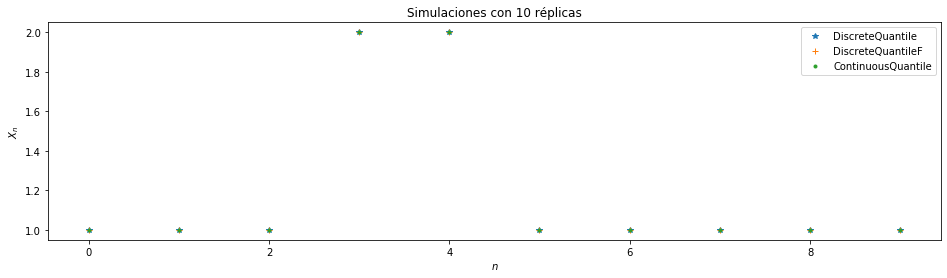

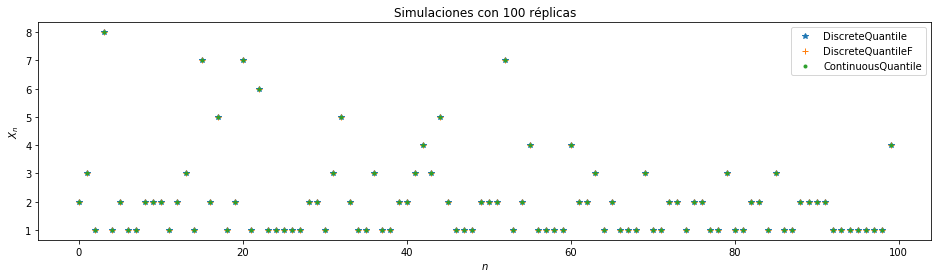

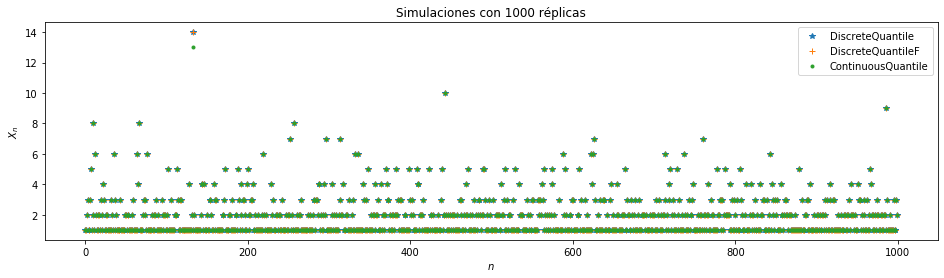

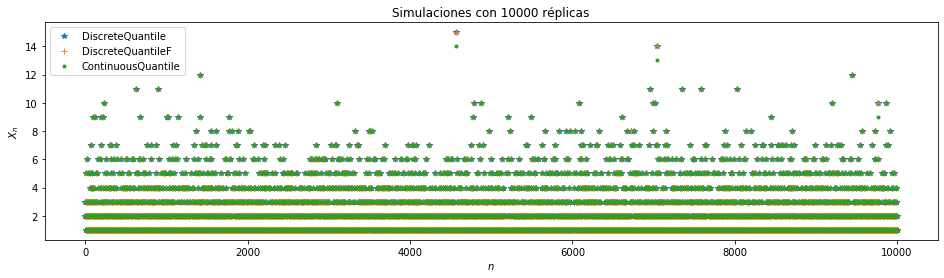

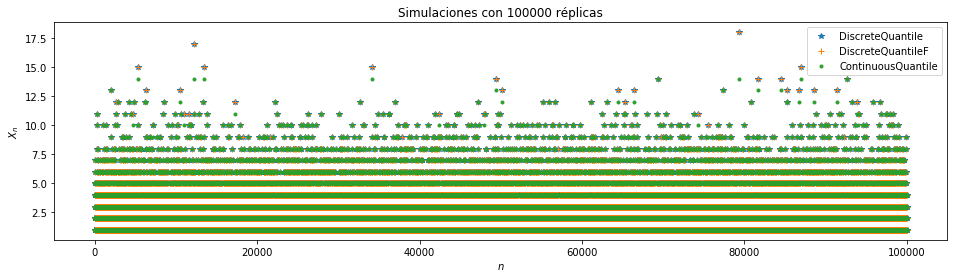

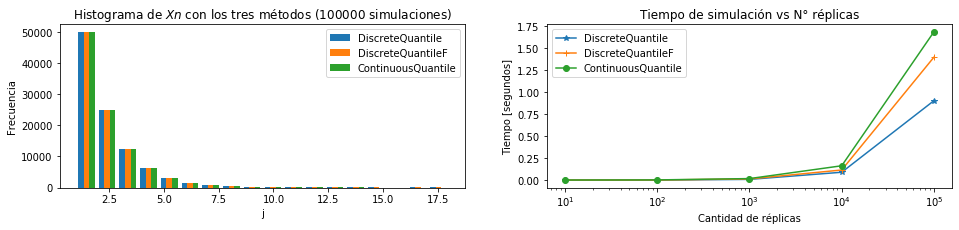

ESTIMACIONES DEL COSTO COMPUTACIONAL DE CADA MÉTODO:
1. DiscreteQuantile: 6.186169147491454e-06
2. DiscreteQuantileF: 9.686835289001464e-06
3. ContinuousQuantile: 2.4018967628479004e-05


In [42]:
k = 5
R = np.zeros(k)
T_discreto = np.zeros(k)
T_discretoF = np.zeros(k)
T_continuo = np.zeros(k)
costo_discreto = np.zeros(k)
costo_discretoF = np.zeros(k)
costo_continuo = np.zeros(k)
np.random.seed(60)  # Semilla para usar las mismas uniformes.

for k in range(1, k+1):
    u = np.random.uniform(size=10**k)
    R[k-1] = 10**k
    
    plt.figure(figsize=(16,4))
    
    # DiscreteQuantile.
    ti = time()
    cuantil_discreto = DiscreteQuantile(densidadX, u)
    tf = time()
    T_discreto[k-1] = tf-ti
    costo_discreto[k-1] = T_discreto[k-1] / 10**k
    plt.plot(cuantil_discreto, '*', label='DiscreteQuantile')
    
    # DiscreteQuantileF.
    tiF = time()
    cuantil_discretoF = DiscreteQuantileF(distribucionX, u)
    tfF = time()
    T_discretoF[k-1] = tfF-tiF
    costo_discretoF[k-1] = T_discretoF[k-1] / 10**k
    plt.plot(cuantil_discretoF, '+', label='DiscreteQuantileF')
    
    # ContinuousQuantile.
    tiC = time()
    cuantil_continuo = np.ceil(ContinuousQuantile(distribucionX, densidadX, u))  # Redondeamos con np.ceil()
    tfC = time()
    T_continuo[k-1] = tfC-tiC
    costo_continuo[k-1] = T_continuo[k-1] / 10**k
    plt.plot(cuantil_continuo, '.', label='ContinuousQuantile')
    
    plt.legend()
    plt.xlabel(r'$n$')
    plt.ylabel(r'$X_n$')
    plt.title('Simulaciones con {n} réplicas'.format(n=10**k))
    plt.show()

plt.figure(figsize=(16,3))
plt.subplot(121)
plt.hist([cuantil_discreto, cuantil_discretoF, cuantil_continuo], bins=18,
         label=['DiscreteQuantile', 'DiscreteQuantileF', 'ContinuousQuantile'])
plt.legend()
plt.xlabel('j')
plt.ylabel('Frecuencia')
plt.title('Histograma de $Xn$ con los tres métodos ({n} simulaciones)'.format(n=10**k))
plt.legend()
plt.subplot(122)
plt.plot(R, T_discreto, '-*', label='DiscreteQuantile')
plt.plot(R, T_discretoF, '-+', label='DiscreteQuantileF')
plt.plot(R, T_continuo, '-o', label='ContinuousQuantile')
plt.xscale('log')
plt.xlabel('Cantidad de réplicas')
plt.ylabel('Tiempo [segundos]')
plt.title('Tiempo de simulación vs N° réplicas')
plt.legend()
plt.show()

c_discreto = np.mean(costo_discreto)  # Estimamos como promedio.
c_discretoF = np.mean(costo_discretoF)
c_continuo = np.mean(costo_continuo)
print('ESTIMACIONES DEL COSTO COMPUTACIONAL DE CADA MÉTODO:')
print('1. DiscreteQuantile:', c_discreto)
print('2. DiscreteQuantileF:', c_discretoF)
print('3. ContinuousQuantile:', c_continuo)

#### ¿En qué medida coinciden los resultados de los tres métodos y por qué?

Para todas las cantidades de réplicas, se observa que $DiscreteQuantile$ y $DiscreteQuantileF$ coinciden totalmente porque matemáticamente son algoritmos equivalentes. Como dicho en el comentario general, en $DiscreteQuantile$ se programa implícitamente la función de distribución de $X$ y en $DiscreteQuantileF$ la función de distribución se utiliza como argumento, para realizar exactamente la misma comparación $$\sum_{j=1}^{n_i}f(j)\geq u_i\Leftrightarrow F(n_i)\geq u_i$$ y terminar el algoritmo acorde a esto. 

Por otro lado, para 10 y 100 réplicas se observa que los resultados de $ContinuousQuantile$ coinciden totalmente con los de $DiscreteQuantile$ (y por tanto, de $DiscreteQuantileF$ también). Sin embargo, desde las 1000 réplicas en adelante se observa que $ContinuousQuantile$ presenta diferencias con los resultados de los otros métodos, en aquellos valores donde $X_n$ toma valores del orden 10. Esto se explica por el error numérico que estamos definiendo para el método de Newton, pues a mayor cantidad de réplicas, es más probable que aparezcan vectores $u\in[0,1]^{n^k}$ con coordenadas $u_i$ muy difíciles de aproximar para el método. A continuación se implementa la misma celda anterior, pero $ContinuousQuantile$ inicializado con tolerancia $10^{-8}$ en lugar de $10^{-4}$.

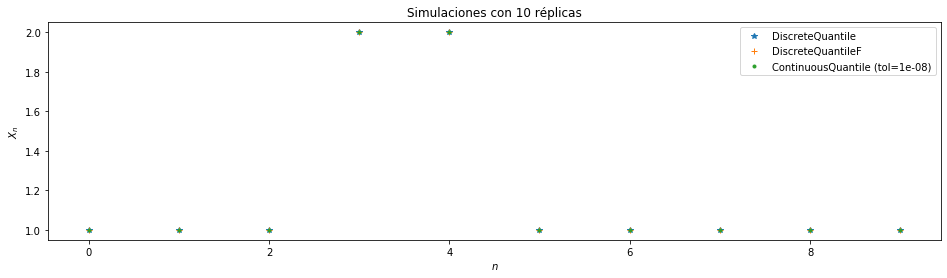

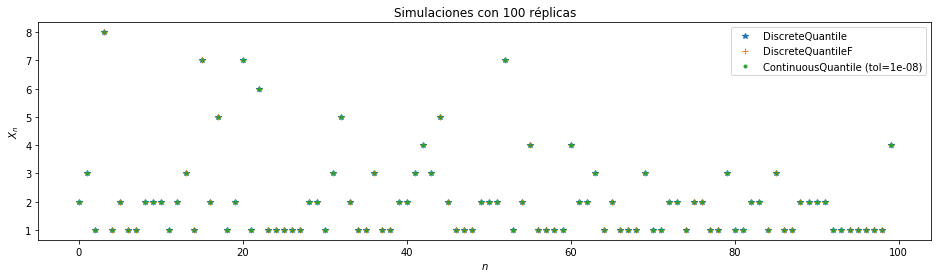

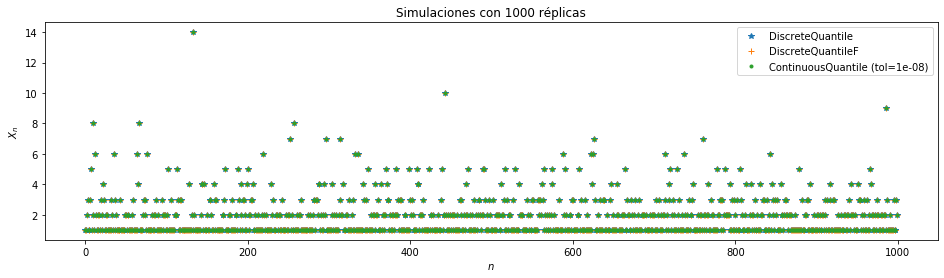

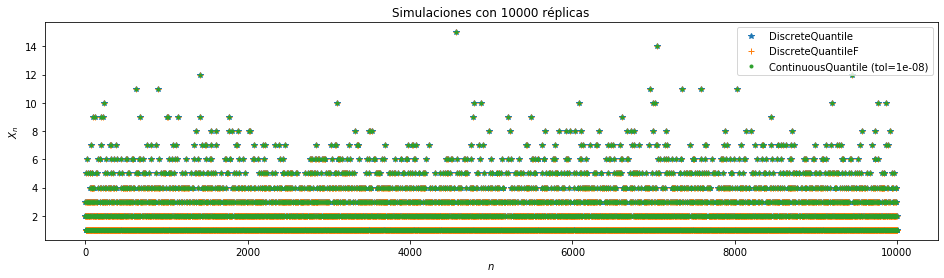

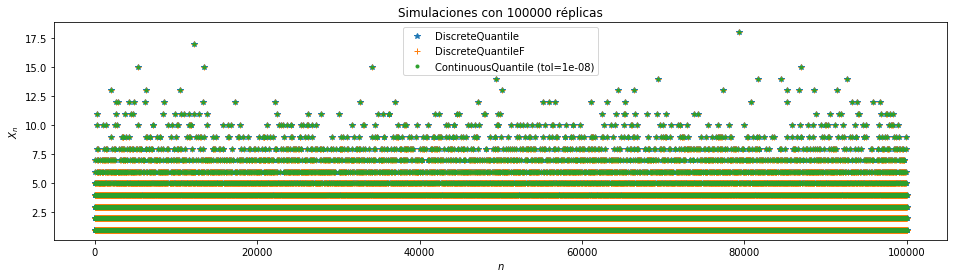

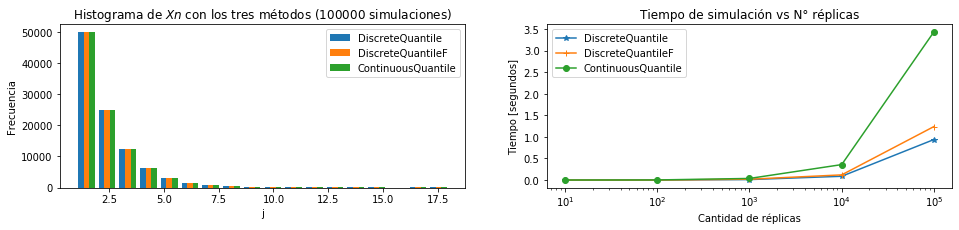

ESTIMACIONES DEL COSTO COMPUTACIONAL DE CADA MÉTODO EN [SEG/RÉPLICA]:
1. DiscreteQuantile: 1.0045100212097168e-05
2. DiscreteQuantileF: 1.0894135951995849e-05
3. ContinuousQuantile: 5.8676611423492435e-05


In [43]:
k = 5
tol = 10**-8
R = np.zeros(k)
T_discreto = np.zeros(k)
T_discretoF = np.zeros(k)
T_continuo = np.zeros(k)
costo_discreto = np.zeros(k)
costo_discretoF = np.zeros(k)
costo_continuo = np.zeros(k)
np.random.seed(60)  # Semilla para usar las mismas uniformes.

for k in range(1, k+1):
    u = np.random.uniform(size=10**k)
    R[k-1] = 10**k
    
    plt.figure(figsize=(16,4))
    
    # DiscreteQuantile.
    ti = time()
    cuantil_discreto = DiscreteQuantile(densidadX, u)
    tf = time()
    T_discreto[k-1] = tf-ti
    costo_discreto[k-1] = T_discreto[k-1] / 10**k
    plt.plot(cuantil_discreto, '*', label='DiscreteQuantile')
    
    # DiscreteQuantileF.
    tiF = time()
    cuantil_discretoF = DiscreteQuantileF(distribucionX, u)
    tfF = time()
    T_discretoF[k-1] = tfF-tiF
    costo_discretoF[k-1] = T_discretoF[k-1] / 10**k
    plt.plot(cuantil_discretoF, '+', label='DiscreteQuantileF')
    
    # ContinuousQuantile.
    tiC = time()
    # ¡AQUÍ HEMOS MODIFICADO LA TOLERANCIA!
    cuantil_continuo = np.ceil(ContinuousQuantile(distribucionX, densidadX, u, tol=tol))
    tfC = time()
    T_continuo[k-1] = tfC-tiC
    costo_continuo[k-1] = T_continuo[k-1] / 10**k
    plt.plot(cuantil_continuo, '.', label='ContinuousQuantile (tol={t})'.format(t=tol))
    
    plt.legend()
    plt.xlabel(r'$n$')
    plt.ylabel(r'$X_n$')
    plt.title('Simulaciones con {n} réplicas'.format(n=10**k))
    plt.show()

plt.figure(figsize=(16,3))
plt.subplot(121)
plt.hist([cuantil_discreto, cuantil_discretoF, cuantil_continuo], bins=18,
         label=['DiscreteQuantile', 'DiscreteQuantileF', 'ContinuousQuantile'])
plt.legend()
plt.xlabel('j')
plt.ylabel('Frecuencia')
plt.title('Histograma de $Xn$ con los tres métodos ({n} simulaciones)'.format(n=10**k))
plt.legend()
plt.subplot(122)
plt.plot(R, T_discreto, '-*', label='DiscreteQuantile')
plt.plot(R, T_discretoF, '-+', label='DiscreteQuantileF')
plt.plot(R, T_continuo, '-o', label='ContinuousQuantile')
plt.xscale('log')
plt.xlabel('Cantidad de réplicas')
plt.ylabel('Tiempo [segundos]')
plt.title('Tiempo de simulación vs N° réplicas')
plt.legend()
plt.show()

c_discreto = np.mean(costo_discreto)  # Estimamos como promedio.
c_discretoF = np.mean(costo_discretoF)
c_continuo = np.mean(costo_continuo)
print('ESTIMACIONES DEL COSTO COMPUTACIONAL DE CADA MÉTODO EN [SEG/RÉPLICA]:')
print('1. DiscreteQuantile:', c_discreto)
print('2. DiscreteQuantileF:', c_discretoF)
print('3. ContinuousQuantile:', c_continuo)

Notar como ahora los resultados obtenidos con los tres métodos coinciden completamente para todas las cantidades de réplicas.

#### Sobre tiempos de ejecución y el método más eficiente
Notar que para cantidades de réplicas del orden $10^3$ las diferencias de tiempo entre los tres métodos son muy pequeñas. Sin embargo, para cantidades de réplicas del orden $10^4$ comenzamos a ver que $DiscreteQuantile$ es el que menos demora y que $ContinuousQuantile$ el que más demora. Esto es esperable tomando en consideración como los métodos trabajan por dentro, particularmente $ContinuousQuantile$ que es el método que para $R$ réplicas de una uniforme, debe realizar exactamente $R$ métodos de Newton-Raphson, lo que es muy costoso computacionalmente y que empeora aún más si subimos mucho la precisión $tol$ inicializada en el método pues esto evidentemente sube la cantidad de iteraciones necesarias de cada Newton-Raphson. Esto se deja ver cuando comparamos el gráfico de tiempos vs n° réplicas, pues $ContinuousQuantile$ se "dispara" en tiempo comparado a los otros dos métodos. Los métodos $DiscreteQuantile$ y $DiscreteQuantileF$ trabajan haciendo aritmética básica y no hay un procedimiento infinito (como la sucesión $(x_n)$ en Newton-Raphson) detrás, lo que explica el menor costo de estos dos métodos.

El método más eficiente es evidentemente el de menor costo. Observar que el tiempo y costo obtenido varía según cada ejecución de la celda. Sin embargo, el orden comparativo es invariante y por ello, considerando los valores que se exponen en el output de las celdas, los métodos ordenados de mayor a menor eficiencia quedan: $DiscreteQuantile>DiscreteQuantileF>ContinuousQuantile$.

### P3.5)

#### Cálculo teórico de $\mathbb{E}(X)$ y $Var(X)$

Necesitaremos el valor de algunas series. Para $x\in\mathbb{R}$ con $|x|<1$, tenemos

$
\begin{align*}
    \sum_{j\geq 1}jx^j=x\sum_{j\geq 1}jx^{j-1}=x\sum_{j\geq 1}\frac{d}{dx}(x^j)=x\frac{d}{dx}\sum_{j\geq 1}x^j=x\frac{d}{dx}x\sum_{j\geq 1}x^{j-1}=x\frac{d}{dx}x\sum_{j\geq 0}x^j=x\frac{d}{dx}\left(\frac{x}{1-x}\right)=\frac{x}{1-x}+\frac{x^2}{(1-x)^2}
\end{align*}
$

Utilizando lo anterior, podemos calcular

$
\begin{align*}
    \sum_{j\geq 1}j^2x^j&=x\sum_{j\geq 1}j^2x^{j-1}=x\sum_{j\geq 1}\frac{d}{dx}(jx^j)=x\frac{d}{dx}\sum_{j\geq 1}jx^j=x\frac{d}{dx}\left(\frac{x}{1-x}+\frac{x^2}{(1-x)^2}\right)=\frac{x}{1-x}+\frac{3x^2}{(1-x)^2}+\frac{2x^3}{(1-x)^3}
\end{align*}
$

Así, usando estas series con el valor $x=\frac{1}{2}$ obtenemos la esperanza y la varianza de $X$ como

$
\begin{align*}
    \mathbb{E}(X)=\sum_{j\geq 1}j\mathbb{P}(X=j)=\sum_{j\geq 1}j\left(\frac{1}{2}\right)^j=\frac{\frac{1}{2}}{1-\frac{1}{2}}+\frac{\frac{1}{4}}{(1-\frac{1}{2})^2}=2
\end{align*}
$

$
\begin{align*}
    Var(X)=\mathbb{E}(X^2)-\mathbb{E}(X)^2=\sum_{j\geq 1}j^2\mathbb{P}(X=j)-2^2=\sum_{j\geq 1}j^2\left(\frac{1}{2}\right)^j-4=\frac{\frac{1}{2}}{1-\frac{1}{2}}+\frac{3(\frac{1}{2})^2}{(1-\frac{1}{2})^2}+\frac{2(\frac{1}{2})^3}{(1-\frac{1}{2})^3}-4=6-4=2
\end{align*}
$

#### Estimación de esperanzas y varianzas muestrales

En virtud de la parte anterior, utilizamos $DiscreteQuantile$ para hacer las estimaciones de esperanzas y varianzas muestrales. Utilizamos los siguientes estimadores insesgados:

$$
\mathbb{E}(X)\approx\overline{X}_n:=\frac{1}{n}\sum_{j=1}^nX_j \quad\quad\quad Var(X)\approx\frac{1}{n-1}\sum_{j=1}^n(\overline{X}_n-X_j)^2
$$

In [44]:
# Aprovechamos de simular hasta 10^7 réplicas.
k = 7
R = np.zeros(k)
esp = np.zeros(k)  # Esperanzas muestrales.
var = np.zeros(k)  # Varianzas muestrales
np.random.seed(60)  # Semilla para usar las mismas uniformes.

for k in range(1, k+1):
    R[k-1] = 10**k
    u = np.random.uniform(size=10**k)
    X = DiscreteQuantile(densidadX, u)
    esp[k-1] = sum(X) / 10**k
    var[k-1] = sum((X - esp[k-1])**2) / (10**k-1)

print(esp)
print(var)

[1.2       2.05      1.906     2.0013    2.00262   2.00033   2.0010176]
[0.17777778 2.29040404 1.78094494 2.01770008 2.01425328 1.99920589
 2.00340557]


Resumiendo los resultados en una tabla, obtenemos:

$
\begin{array}{|c|c|}
\hline
\text{N° de réplicas} & 10 & 10^2 & 10^3 & 10^4 & 10^5 & 10^6 & 10^7 & \text{Valor teórico} \\
\hline
\mathbb{E}(X) & 1,200 & 2,050 & 1,906 & 2,001 & 2,002 & 2,000 & 2,001 & 2\\ 
\hline
Var(X) & 0,177 & 2,290 & 1,781 & 2,017 & 2,014 & 1,999 & 2,003 & 2\\
\hline
\end{array}
$

Se observa que las esperanzas y varianzas muestrales tienden a los valores teóricos conseguidos anteriormente, con cierta "oscilación" alrededor de estos. De esta manera se verifica la LGN aplicada al caso de la v.a. $X$ que estamos trabajando.

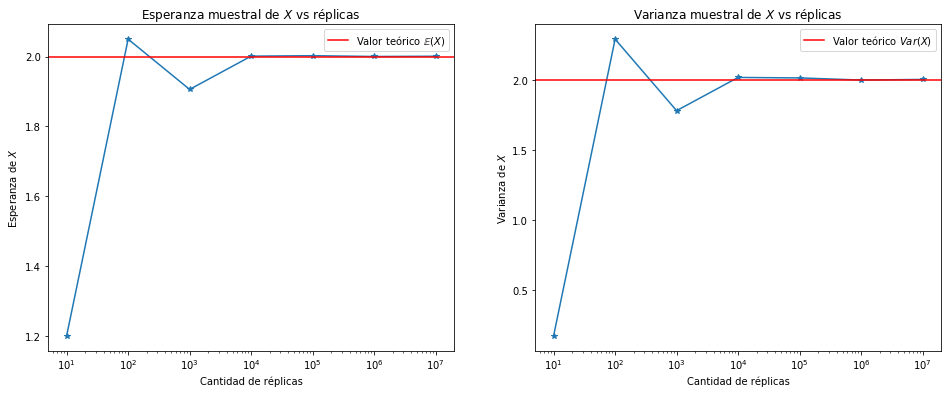

In [34]:
plt.figure(figsize=(16,6))
plt.subplot(121)
plt.plot(R, esp, '-*')
plt.axhline(y=2, color='red', label=r'Valor teórico $\mathbb{E}(X)$')
plt.xlabel('Cantidad de réplicas')
plt.xscale('log')
plt.ylabel(r'Esperanza de $X$')
plt.title(r'Esperanza muestral de $X$ vs réplicas')
plt.legend()
plt.subplot(122)
plt.plot(R, var, '-*')
plt.axhline(y=2, color='red', label=r'Valor teórico $Var(X)$')
plt.xlabel('Cantidad de réplicas')
plt.xscale('log')
plt.ylabel(r'Varianza de $X$')
plt.title(r'Varianza muestral de $X$ vs réplicas')
plt.legend()
plt.show()

## Problema 4
### P4.1)

Definimos $\lambda=1$, $s=8$ y generamos un vector de tamaño $s+1$, $p=(p_k)_{k=0}^s$ donde 

$$p_k=\mathbb{P}(Y_{\lambda,s}=k)=\dfrac{e^{-\lambda}\lambda^k/k!}{\sum_{j=0}^se^{-\lambda}\lambda^j/j!}$$

In [2]:
lam=1 #definimos lambda
s=8   #definimos s
p=[(math.exp(-lam)*lam**k/math.factorial(k))/sum(math.exp(-lam)*lam**j/math.factorial(j) for j in range(s+1) ) for k in range(s+1)] #vector de probabilidades de Y_lambda,s


Por otro lado, generamos dos vectores $p_{uniforme}=(p_u^k)_{k=0}^s$ y $p_{poisson}=(p_p^k)_{k=0}^s$ que contienen la distribución de variables aleatorias $\mathcal{U}$ uniforme discreta de parámetro $s$ y $\mathcal{P}$ Poisson de parámetro $\lambda$, es decir:

$$p_u^k=\mathbb{P}(\mathcal{U}=k)=\dfrac{1}{s+1}$$

$$p_p^k=\mathbb{P}(\mathcal{P}=k)=\dfrac{e^{-\lambda}\lambda^k}{k!}$$

In [3]:
p_uniforme=[1/(s+1) for k in range(s+1)] #probabilidades de una Uniforme discreta de parámetro s
p_poisson=[math.exp(-lam)*lam**k / math.factorial(k) for k in range(0,s+1)]  #probabilidades de una poisson con parametro lambda

Se hacen dos métodos para simular $n$ copias de la variable aleatoria $Y_{\lambda,s}$. En ámbos se útiliza el proceso de Aceptación/Rechazo. En el primero se utilizan variables aleatorias Uniformes discretas de parámetro $s$ y en el otro variables aleatorias Poisson de parámetro $\lambda$.


Notamos que para todo $k\in\left\{0,\dots,s\right\}$:
$$\dfrac{p_k}{p_u^k}=\dfrac{p_k}{1/(s+1)}\leq s+1$$


$$\dfrac{p_k}{p_p^k}=\left(\dfrac{e^{-\lambda}\lambda^k/k!}{\sum_{j=0}^se^{-\lambda}\lambda^j/j!}\right)\dfrac{1}{e^{-\lambda}\lambda^k/k!}=\dfrac{1}{\sum_{j=0}^se^{-\lambda}\lambda^j/j!}$$

Luego, $c=s+1$ y $c_2=\dfrac{1}{\sum_{j=0}^se^{-\lambda}\lambda^j/j!}$ serán nuestras constantes para realizar el proceso aceptación/rechazo en los métodos 1 (mediante Uniformes) y 2 (mediante Poisson), respectivamente

In [4]:
c=s+1 #constante para metodo 1
c2=1/sum(math.exp(-lam)*(lam**j)/math.factorial(j) for j in range(s+1)) #constante para metodo 2

En el primer método, para obtener variables aleatorias $\mathcal{U}_s$ uniformes discretas de parámetro $s$, se simulan mediante uniformes continuas $\mathcal{U}$ en el intervalo $[0,1]$ definiendo 

$$\mathcal{U}_s=\sum_{k=1}^sk\cdot\mathbb{1}_{[a_{k-1},a_k)}(\mathcal{U})$$

donde $a_k=\sum_{i=0}^k\mathbb{P}(\mathcal{U}_s=i)$. Una vez generada, se procede a la (aceptación/rechazo).

En el segundo, para obtener variables aleatorias $\mathcal{P}$ Poisson de parámetro $\lambda$, las simulamos mediante $s+1$ variables aleatorias uniformes continuas $\left(\mathcal{U_i}\right)_{i=0}^s$, definiendo: 

$$N=\sup\left\{n\in\mathbb{N} \cup \{0\}  : -\sum_{i=0}^n\ln(U_i)>\lambda\right\}=\max\left\{n \in [s]: -\sum_{i=0}^n\ln(U_i)>\lambda\right\}$$

Una vez generada una copia, se procede a la aceptación rechazo

Ámbas funciones entregan un par con dos vectores: el primero con las $n$ copias de $Y_{\lambda,s}$ y el segundo con la cantidad de uniformes continuas $\mathcal{U}$ que se requirieron antes de aceptar el valor de la copia.

In [5]:
#METODO 1
def nCopiasUniforme_s(n): 
    final=[0]*n #vector con las n copias
    numeroUniformes=[0]*n #vector con la cantidad de uniformes usadas en cada copia
    for i in range(n): #hacemos la i-ésima copia
        b=True #cuando terminamos b=False
        while(b):
            U_unif_discreta_s=0     #Inicializo, este tomará el valor de la simulación de la Uniforme Discreta U_s de parámetro s
            U_uniforme=np.random.uniform(0,1) #generamos una v.a. U uniforme continua en [0,1]
            a_uniforme=[sum(p_uniforme[j] for j in range(k)) for k in range(1,s+2)] #generamos partición de [0,1]
            k=1
            while(k<s+1): #recorremos [0,1] a través de su partición
                if U_uniforme < a_uniforme[0]: #si U<a(0) entonces U=0 y tenemos la copia de U_s
                    U_uniforme_discreta_s=0
                    k=s+1
                elif U_uniforme <a_uniforme[k] and U_uniforme >=a_uniforme[k-1]: #si a(k)>U>=a(k-1) entonces U=k y tenemos la copia de U_s
                    U_unif_discreta_s=k
                    k=s+1
                else: #si no se cumplen las anteriores, pasamos a k+1.
                    k+=1
            #Una vez finalizado el último while, tenemos U_s copia de una uniforme discreta de parámetro s.           
            U=np.random.uniform(0,1)      #generamos una uniforme para la (aceptacion/rechazo)
            if (U< p[U_unif_discreta_s]/(c*p_uniforme[U_unif_discreta_s])): #si U<P(P=U_s)/(c*P(Y_lambda,s = U_s)), con P Poisson, entonces 
                #obtenemos nuestra i-ésima copia de Y_lambda,s y terminamos el while, sino se repite el procedimiento.
                final[i]=U_unif_discreta_s
                b=False
            numeroUniformes[i]+=1 #contamos la cantidad de iteraciones (ie, la cantidad de uniformes usadas)
    return [final,numeroUniformes] #retornamos un par con las copias y el número de uniformes usadas por cada una

#METODO 2
def nCopiasPoisson(n):
    final=[0]*n #vector con las n copias
    numeroUniformes=[0]*n
    for i in range(n): #hacemos la i-ésima copia
        b=True #cuando terminamos b=False
        while(b):
            U_poisson=0 #Inicializo, este tomará el valor de la simulación de la Poisson
            U_uniforme=np.random.uniform(0,1,s+1) #Hago s+1 uniformes continuas [0,1]
            sumasU=[-sum(math.log(U_uniforme[i]) for i in range(k)) for k in range(s+1)] #guardo las sumas -sum(ln(U_i))
            N=0 #inicio N=0
            for j in range(len(sumasU)):
                if sumasU[j]<lam and j>N: #si se cumple que -sum(ln(U_j))<lambda entonces N=j, así encuentro el máximo
                    N=j
            U_poisson=N #este es el máximo N tal que -sum(ln(U_j))<lambda, ie nuestra copia Poisson
            #Ya tenemos nuestra Poisson para (aceptacion/rechazo)
            U=np.random.uniform(0,1) #Genero la Uniforme [0,1] 
            #itero, si se cumple la condicion b=False, y se termina el while, sino se repite el procedimiento.
            if U< p[U_poisson]/(c2*p_poisson[U_poisson]): #p es el vector de probabilidades de la v.a. a simular
                final[i]=U_poisson
                b=False
            numeroUniformes[i]+=1 #contamos la cantidad de iteraciones (ie la cantidad de uniformes usadas)
    return [final,numeroUniformes] #retornamos un par con las copias y el número de uniformes usadas por cada una


#### Eficiencia Computacional (costo por réplica)

Vemos lo que sucede con la eficiencia computacional. Para esto generamos $n=100$ copias y calculamos los tiempos de ejecución $T_n$ y $T_n'$ de cada método. Se tendrá que los tiempos por réplica $C$ y $C'$ del método 1 y 2, respectivamente serán:

$$C=\dfrac{T_n}{n},\quad C'=\dfrac{T_n'}{n} $$

In [6]:
n=100 

#### Primer método 

In [7]:
#COSTO METODO 1
def CostoMetodo1(n):
    ti=time() #guardamos tiempo inicial
    nCopiasUniforme_s(n) #ejecutamos
    tf=time() #guardamos tiempo final
    return (tf-ti)/n #retornamos tiempo por réplica
CostoMetodo1(n) #costo por réplica total usando n=100

0.0003292322158813477

#### Segundo método

In [8]:
#COSTO METODO 2
def CostoMetodo2(n):
    ti=time() #guardamos tiempo inicial
    nCopiasPoisson(n) #ejecutamos
    tf=time() #guardamos tiempo final
    return (tf-ti)/n #retornamos tiempo por réplica

CostoMetodo2(n) #costo por réplica total usando n=100

8.00013542175293e-05

Es posible notar que cada vez que se ejecutan las funciones "CostoMetodo1" y "CostoMetodo2", entregan valores distintos. Esto no genera ningún inconveniente, pues el orden de tamaño entre ambas se mantiene.

### P4.2)

Para estimar $\mathbb{E}(Y_{\lambda,s})$ es necesario realizar una estimación de $\sigma^2=\mathbb{V}\text{ar}(Y_{\lambda,s})$. Esto se hace a través de una "simulación piloto" en ámbos métodos: se generan $(Y_m)_{m=0}^{q-1}$, $q=100$ copias de $Y_{\lambda,s}$ y se calcula:
$$\overline{Y_q}=\dfrac{\sum_{m=0}^q Y_m}{q} \Longrightarrow \sigma^2 \approx \dfrac{\sum_{m=0}^q(\overline{Y_q}-Y_i)^2}{q-1} $$

In [9]:
q=100 #definimos la cantidad de copias para la simulación piloto

#### Primer método

Estimamos varianza: simulación "piloto"

In [10]:
np.random.seed(100) #sembramos semilla para fijar los valores de Y (y que no cambien en cada ejecución)
Y=nCopiasUniforme_s(q)[0] #Y es el vector con las q=100 copias de Y_lambda,s
media_1=sum(Y)/q #calculamos la media para estimar la varianza
sigma2_1=sum((media_1-Y[k])**2 for k in range(q))/(q-1) #estimamos su varianza 

Una vez hecho esto, tenemos una estimación $\sigma^2\approx\mathbb{V}\text{ar}(Y_{\lambda,s})$ y podemos realizar una estimación de $\mathbb{E}(Y_{\lambda,s})$ con una tolerancia de $\varepsilon=0.2$ y un intervalo de confianza del $95\%$

In [11]:
epsilon=0.2 #definimos la tolerancia

Para $\alpha=0.05$, tomamos $z_{\frac{\alpha}{2}}$ tal que 

$$\mathbb{P}(|\mathcal{N}(0,1) |>z_{\frac{\alpha}{2}})=\dfrac{\alpha}{2}$$

luego, $z_{\frac{\alpha}{2}}=1.96$
y elegimos $n \in \mathbb{N}$ tal que 

$$n\geq\dfrac{\sigma^2\cdot z_{\frac{\alpha}{2}}^2}{\varepsilon^2}$$

Luego, $n=\left\lceil\dfrac{\sigma^2\cdot z_{\frac{\alpha}{2}}^2}{\varepsilon^2}\right\rceil$

In [55]:
print('n','=',math.ceil(sigma2_1*1.96**2/epsilon**2))
n_0=math.ceil(sigma2_1*1.96**2/epsilon**2) #imprimimos el valor de n

n = 98


Por lo que la cantidad de copias necesarias será de $n=98$

In [13]:
np.random.seed(100) #fijamos el valor de Y1 (para que no cambien en cada ejecucion)
Y1=nCopiasUniforme_s(n_0)[0] #Y1 son las n=98 copias de Y_lambda,s
esperanza=sum(Y1)/n_0 #estimamos su esperanza
print('Estimacion E metodo 1','=',esperanza) 

Estimacion E metodo 1 = 1.0510204081632653


Luego, $\mathbb{E}(Y_{\lambda,s})\approx 1.0510$

#### Segundo método

Estimamos varianza: simulación "piloto"

In [14]:
np.random.seed(100) #sembramos semilla para fijar los valores de Y (y que no cambien en cada ejecución)
Y=nCopiasPoisson(q)[0] #Y es el vector con las q=100 copias de Y_lambda,s
media_2=sum(Y)/q #calculamos la media para estimar la varianza
sigma2_2=sum((media_2-Y[k])**2 for k in range(q))/(q-1) #estimamos su varianza 

Una vez hecho esto, tenemos una estimación $(\sigma')^2\approx\mathbb{V}\text{ar}(Y_{\lambda,s})$ y podemos realizar una estimación de $\mathbb{E}(Y_{\lambda,s})$ con una tolerancia de $\varepsilon=0.2$ y un intervalo de confianza del $95\%$

Para $\alpha=0.05$, tomamos $z_{\frac{\alpha}{2}}$ tal que 

$$\mathbb{P}(|\mathcal{N}(0,1) |>z_{\frac{\alpha}{2}})=\dfrac{\alpha}{2}$$

luego, $z_{\frac{\alpha}{2}}=1.96$
y elegimos $n \in \mathbb{N}$ tal que 

$$n\geq\dfrac{(\sigma')^2\cdot z_{\frac{\alpha}{2}^2}}{\varepsilon^2}$$

Luego, 

$$n=\left\lceil\dfrac{(\sigma')^2\cdot z_{\frac{\alpha}{2}}^2}{\varepsilon^2}\right\rceil$$

In [15]:
print('n','=',math.ceil(sigma2_2*1.96**2/epsilon**2))
n_0=math.ceil(sigma2_2*1.96**2/epsilon**2) #imprimimos el valor de n

n = 85


Por lo que la cantidad necesaria de copias será $n=85$

In [16]:
np.random.seed(100)#fijamos el valor de Y2 (para que no cambien en cada ejecucion)
Y2=nCopiasPoisson(n_0)[0]  #Y1 son las n=98 copias de Y_lambda,s
esperanza=sum(Y2)/n_0 #estimamos su esperanza
print('Estimacion E metodo 2','=',esperanza)

Estimacion E metodo 2 = 0.8352941176470589


Luego, $\mathbb{E}(Y_{\lambda,s})\approx 0.8367$

En ambos casos $\mathbb{E}(Y_{\lambda,s})$ toma valores cercanos a $1$.

#### Vemos que método es preferible

Para ver qué método es mejor, se tiene en cuenta la siguiente relación:

$$T_n<T'_n \Longleftrightarrow C\cdot\sigma^2 < C'\cdot (\sigma')^2$$

In [17]:
def mejormetodo(n): #generamos una función que indica cual metodo es preferible mediante el criterio anterior
    if CostoMetodo1(n)*sigma2_1<CostoMetodo2(n)*sigma2_2: 
        print('Es preferible el metodo 1')
    if CostoMetodo1(n)*sigma2_1>CostoMetodo2(n)*sigma2_2:
        print('Es preferible el metodo 2')
    else:
        print('Es lo mismo')
        

In [18]:
mejormetodo(n_0) #ejecutamos la función anterior

Es preferible el metodo 2


#### Gráficos

##### 1) Tiempo por réplica vs cantidad de réplicas

In [19]:
cantidad=[10*i for i in range(1,101)] #tomamos 100 valores para n=cantidad de copias.
Tejecucion=[CostoMetodo1(i)*i for i in cantidad] #guardamos los tiempos de ejecución de ambos métodos
Tejecucion2=[CostoMetodo2(i)*i for i in cantidad]

Text(0, 0.5, 'Tiempo de ejecución')

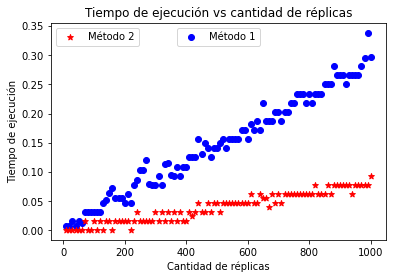

In [20]:
metodo1=plt.scatter(cantidad,Tejecucion,c="blue",label='Método 1')
metodo2=plt.scatter(cantidad,Tejecucion2,c="red", label='Método 2',marker='*')
leyenda1=plt.legend(handles=[metodo1], loc='upper center')
ax = plt.gca().add_artist(leyenda1)
plt.legend(handles=[metodo2],loc='upper left')
plt.title('Tiempo de ejecución vs cantidad de réplicas')
plt.xlabel('Cantidad de réplicas')
plt.ylabel('Tiempo de ejecución')

Claramente se ve que los tiempos de ejecución del Método 2 (Poisson) son menores a los del Método 1 (Uniformes), sea cual sea la cantidad de réplicas solicitadas. Este hecho esta fuertemente relacionado con la diferencia entre la cantidad de uniformes que se utiliza en cada uno antes de llegar a un valor aceptable de cada copia. Esto es posible de ver en los gráficos siguientes de Cantidad de uniformes usadas vs número de réplica:

##### 2) Cantidad de uniformes vs número de réplica

In [21]:
n=1000
np.random.seed(100) #fijamos los valores de UnifMetodo1 y UnifMetodo 2
UnifMetodo1=nCopiasUniforme_s(n)[1] #hacemos n=1000 copias con cada método
UnifMetodo2=nCopiasPoisson(n)[1]

In [22]:
y=[i for i in range(n)] #vector que indexa el número de copia.

Text(0, 0.5, 'Cantidad de Uniformes usadas')

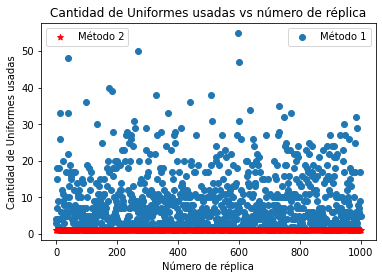

In [23]:
metodo1=plt.scatter(y,UnifMetodo1,label='Método 1')
metodo2=plt.scatter(y,UnifMetodo2,c="red",marker='*',label='Método 2')
leyenda1=plt.legend(handles=[metodo1], loc='upper right')
ax = plt.gca().add_artist(leyenda1)
plt.legend(handles=[metodo2],loc='upper left')
plt.title('Cantidad de Uniformes usadas vs número de réplica')
plt.xlabel('Número de réplica')
plt.ylabel('Cantidad de Uniformes usadas')

Text(0, 0.5, 'Cantidad de Uniformes usadas')

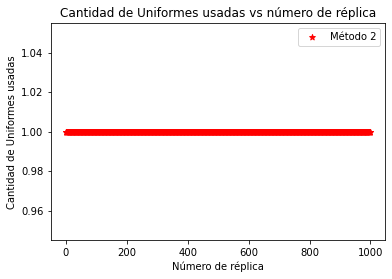

In [24]:
metodo2=plt.scatter(y,UnifMetodo2,c="red",marker='*',label='Método 2')
leyenda1=plt.legend(handles=[metodo2], loc='upper right')
plt.title('Cantidad de Uniformes usadas vs número de réplica')
plt.xlabel('Número de réplica')
plt.ylabel('Cantidad de Uniformes usadas')


La cantidad de Uniformes que utiliza el Método 1 varía mucho para cada réplica (no tiene un comportamiento definido), a diferencia del Método 2, que siempre utiliza una. Una razón de esto es la similitud de la distribución de $Y_{\lambda,s}$ con una Poisson. Esto explica las diferencias de los tiempos de ejecución.

##### 3) Varianza vs cantidad de copias

In [25]:
np.random.seed(100) #fijamos los valores de SIGMA2_1
SIGMA2_1=[sum((sum(nCopiasUniforme_s(n)[0])/n-nCopiasUniforme_s(n)[0][k])**2 for k in range(n))/(n-1) for n in range(2,100)]
#vector que corresponde a las varianzas estimadas con metodo 1, con n copias, para n entre 2 y 99.

In [26]:
np.random.seed(100) #fijamos los valores de SIGMA2_2
SIGMA2_2=[sum((sum(nCopiasPoisson(n)[0])/n-nCopiasPoisson(n)[0][k])**2 for k in range(n))/(n-1) for n in range(2,100)]
#vector que corresponde a las varianzas estimadas con el método 2, con n copias, para n entre 2 y 99.

Text(0.5, 1.0, 'Varianza estimada vs. cantidad de Copias')

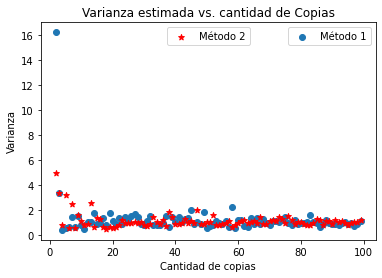

In [35]:
metodo1=plt.scatter([i for i in range(2,100)],SIGMA2_1,label='Método 1')
metodo2=plt.scatter([i for i in range(2,100)],SIGMA2_2,color="red",marker='*', label='Método 2')
leyenda1=plt.legend(handles=[metodo1],loc='upper right')
ax = plt.gca().add_artist(leyenda1)
plt.legend(handles=[metodo2],loc='upper center')
plt.xlabel('Cantidad de copias')
plt.ylabel('Varianza')
plt.title('Varianza estimada vs. cantidad de Copias')

(0.0, 3.0)

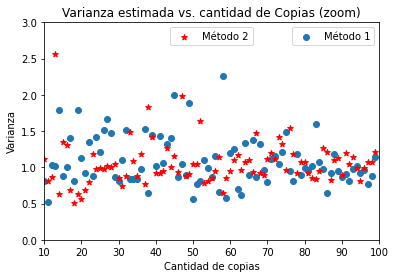

In [54]:
#hacemos zoom al gráfico anterior
metodo1=plt.scatter([i for i in range(2,100)],SIGMA2_1,label='Método 1')
metodo2=plt.scatter([i for i in range(2,100)],SIGMA2_2,color="red",marker='*', label='Método 2')
leyenda1=plt.legend(handles=[metodo1],loc='upper right')
ax = plt.gca().add_artist(leyenda1)
plt.legend(handles=[metodo2],loc='upper center')
plt.xlabel('Cantidad de copias')
plt.ylabel('Varianza')
plt.title('Varianza estimada vs. cantidad de Copias (zoom)')
plt.xlim(10,100)
plt.ylim(0,3)

Para el caso de la varianza podemos ver que en ámbos métodos sus valores se aproximan a 1 desde $n\approx 5$, con el Método 1 haciéndolo de forma mas dispersa que el Método 2.

##### 4) Esperanza vs cantidad de copias

In [28]:
np.random.seed(100) #fijamos los valores de ESPERANZA1
ESPERANZA1=[sum(nCopiasUniforme_s(n)[0])/n for n in range(1,1000)] #vector con las estimaciones de esperanza con el método 1
#con n copias, para n entre 1 y 999

In [29]:
np.random.seed(100) #fijamos los valores de ESPERANZA2
ESPERANZA2=[sum(nCopiasPoisson(n)[0])/n for n in range(1,1000)] #vector con las estimaciones de esperanza con el método 2
#con n copias, para n entre 1 y 999

Text(0.5, 1.0, 'Esperanza estimada vs. Cantidad de copias')

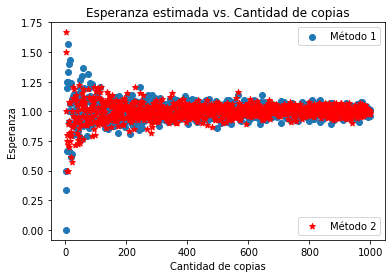

In [30]:
line1 =plt.scatter([i for i in range(1,1000)],ESPERANZA1, label='Método 1')
line2 =plt.scatter([i for i in range(1,1000)],ESPERANZA2,c="red",label="Método 2",marker='*')
leyenda1=plt.legend(handles=[line1],loc='upper right')
ax = plt.gca().add_artist(leyenda1)
plt.legend(handles=[line2], loc='lower right')
plt.xlabel("Cantidad de copias")
plt.ylabel('Esperanza')
plt.title('Esperanza estimada vs. Cantidad de copias')

Por último, en el gráfico se ve que la esperanza estimada cada $n$ cantidad de copias calculada como

$$\mathbb{E}(Y_{\lambda,s})\approx\dfrac{\sum_{i=1}^n Y_n}{n}$$

se acerca al valor 1 cuando $n$ se hace mas grande. El Método 2 lo hace de una manera mas precisa al Método 1 el cual es un poco mas disperso, hecho que se relaciona con la eficiencia de cada uno.